In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':2000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Equities","Domestic'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-25 - 86'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PGX,64,0.794638,0.429711,1.461380,1.237116
SPLV,64,2.047045,1.367685,1.374862,1.971365
USMV,64,2.073082,1.671132,1.140793,2.180427
PFF,64,0.799474,0.671274,0.942697,1.003023
MTUM,64,1.954946,1.975985,0.905006,2.859384
XMLV,64,1.203794,1.543103,0.672105,3.688597
VIG,64,1.522365,2.392525,0.566639,4.634193
VOT,64,1.509063,3.095762,0.433624,5.627908
VOOG,64,1.370093,2.828891,0.425406,6.391444


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['PGX'] -0.41395713383244837 0.6 0.24742325575833032 1.4613803895907789
['PGX', 'SPLV'] -0.6101706018111637 0.48710247889911495 0.32084811467000235 1.418121195380281


['PGX', 'SPLV']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['PGX', 'SPLV'], sr=0)

['PGX', 'SPLV'] 0.8079505935691174 0.48710247889911495 0.32084811467000235 1.418121195380281
['PGX', 'SPLV', 'USMV'] 0.6127247715097036 0.6534642442275507 0.35926052728215296 1.3256784059285711
['PGX', 'SPLV', 'USMV', 'PFF'] 0.23532687994736962 0.7157303506735994 0.3195965292737703 1.2299329552866909
['PGX', 'SPLV', 'USMV', 'XMLV'] 0.18079718497259378 0.5269219218338684 0.4538752631387254 1.1622850880656383
['PGX', 'SPLV', 'PFF', 'XMLV'] 0.08676527368377174 0.49176021485950433 0.39500505882426745 1.112761032149613


['PGX', 'SPLV', 'PFF', 'XMLV']

In [6]:
quote.setup_mask(['SPLV', 'XMLV'])
quote.find_optimal_ratio(21, 2)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 SPLV    0.60515
 XMLV    0.39485
 dtype: float64, 1.7141, 1.2208)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
PGX,64.0,0.794638,0.429711,-0.362675,0.515299,0.869393,1.078988,1.719729,1.461380,1.237116
SPLV,64.0,2.047045,1.367685,-0.950251,1.191957,1.930746,2.964536,4.955302,1.374862,1.971365
Portfolio,64.0,1.528526,1.042525,-1.296652,1.176523,1.516202,2.226345,3.412848,1.306309,1.543277
PFF,64.0,0.799474,0.671274,-0.784674,0.292013,0.853580,1.274722,2.225926,0.942697,1.003023
XMLV,64.0,1.203794,1.543103,-3.104261,0.441491,1.430702,2.203992,4.041849,0.672105,3.688597


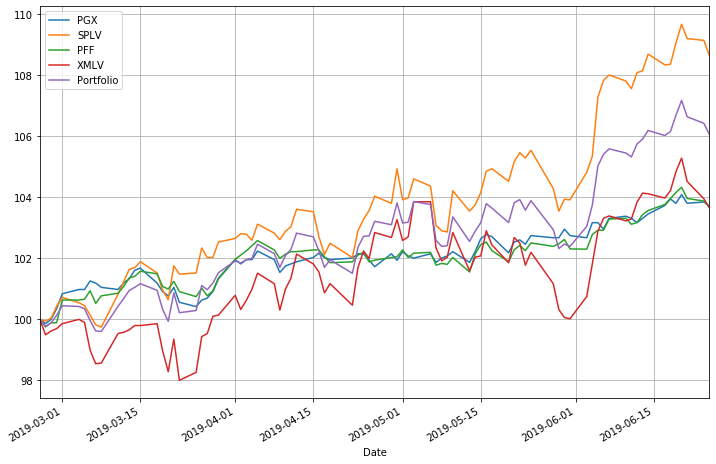

In [7]:
%pylab inline
quote.setup_mask(['PGX', 'SPLV', 'PFF', 'XMLV'])
quote.graph(21, {'PGX': .1, 'PFF': .1, 'SPLV': .48, 'XMLV': .32})